<a href="https://colab.research.google.com/github/Nirzaree/MLWithPython/blob/master/ML_Learning_101_Unsupervised_Learning_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Concept

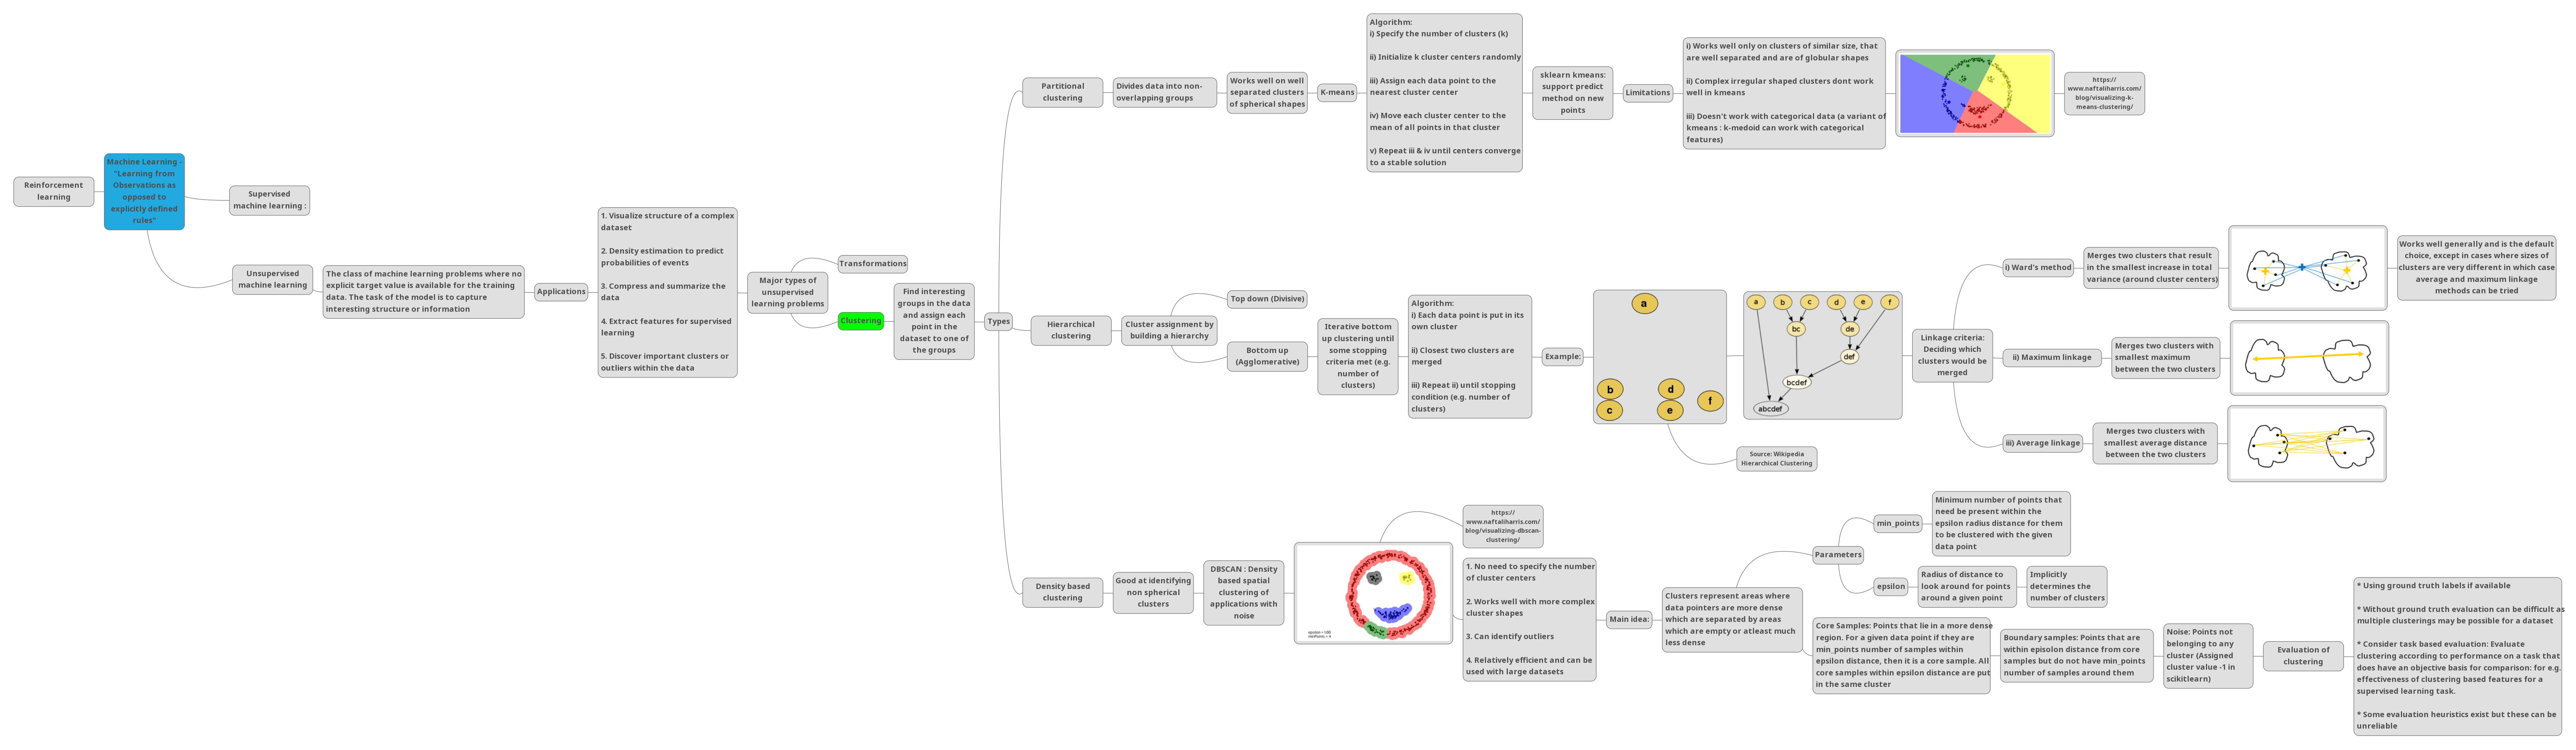

## Setup

In [32]:
import numpy as np
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer,make_blobs
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from statistics import mode

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
!cp '/content/drive/My Drive/Colab Notebooks/MLWithPython/ADSPYCourseStuff/fruit_data_with_colors.txt' .

## Case studies

### Clustering

#### k-means clustering

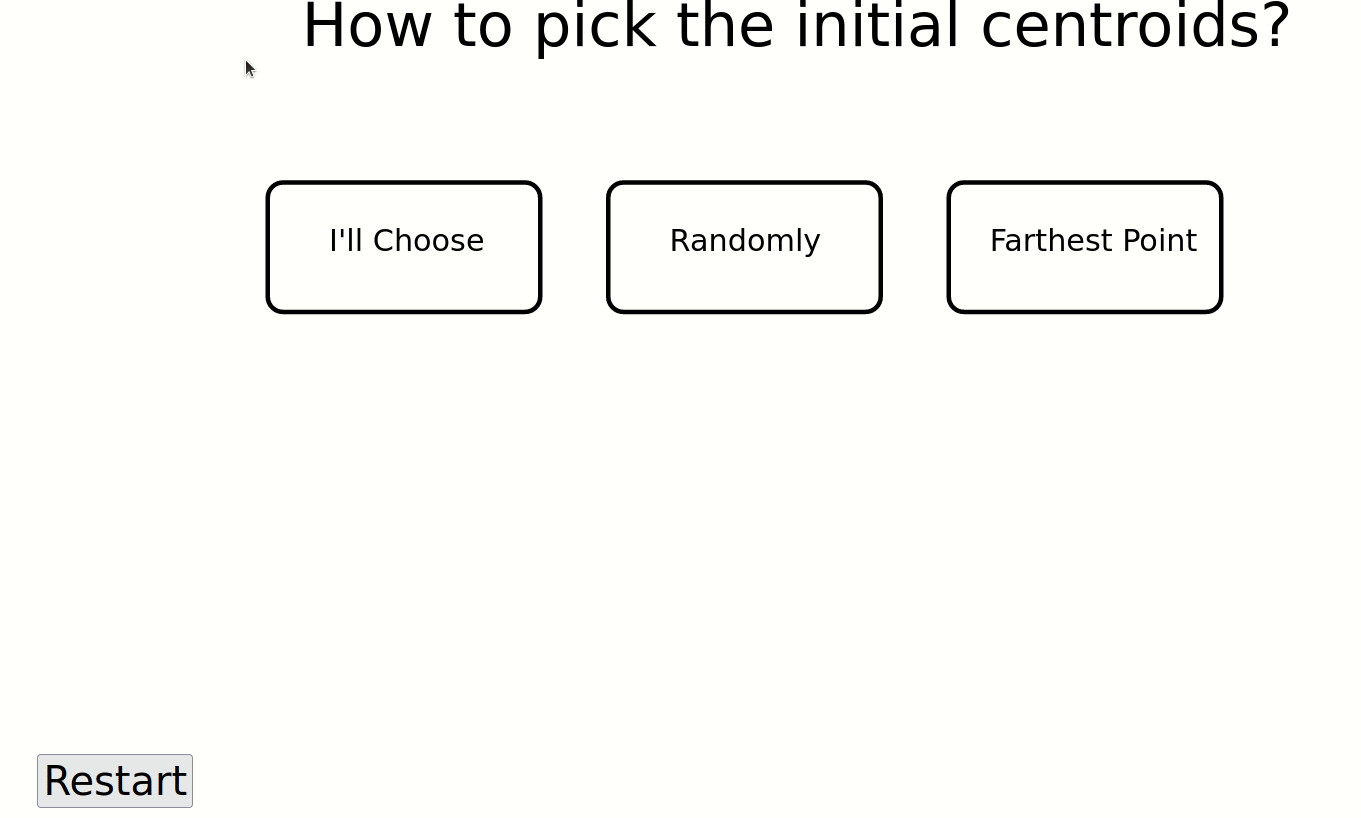

##### Synthetic dataset

In [5]:
# X_kmeans,y_kmeans = make_blobs(n_samples=100,
#            centers=3,
#            cluster_std = 1,
#            random_state=0)

X_synth,y_synth = make_blobs(
           random_state=10)

Text(0.5, 1.0, 'Synthetic dataset for kmeans clustering')

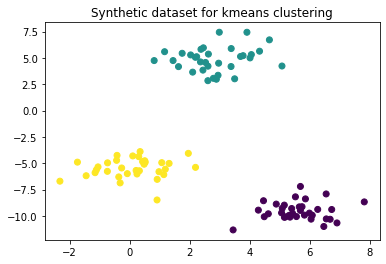

In [6]:
plt.scatter(X_synth[:,0],X_synth[:,1],c=y_synth)
plt.title('Synthetic dataset for kmeans clustering')

In [7]:
kmeans = KMeans(n_clusters=3)

In [8]:
kmeans.fit(X_synth)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'kmeans clusters on the synthetic dataset')

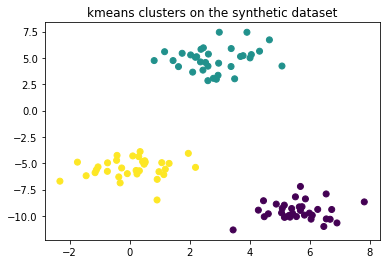

In [9]:
plt.scatter(X_synth[:,0],X_synth[:,1],c=kmeans.labels_)
plt.title('kmeans clusters on the synthetic dataset')

* kmeans has perfectly identified the clusters. 

##### Fruits dataset

In [12]:
FruitsData = pd.read_table('fruit_data_with_colors.txt')

In [13]:
FruitsData.head()

fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55
1            1      apple  granny_smith   180    8.0     6.8         0.59
2            1      apple  granny_smith   176    7.4     7.2         0.60
3            2   mandarin      mandarin    86    6.2     4.7         0.80
4            2   mandarin      mandarin    84    6.0     4.6         0.79

In [14]:
fruitfeatures = ['mass','width','height','color_score']

In [16]:
X_fruits,y_fruits = FruitsData[fruitfeatures],FruitsData['fruit_label']

In [17]:
scaler = StandardScaler()

In [18]:
X_fruits_scaled = scaler.fit_transform(X_fruits)

In [19]:
kMeansFruits = KMeans(n_clusters=4)

In [20]:
kMeansFruits.fit(X_fruits_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

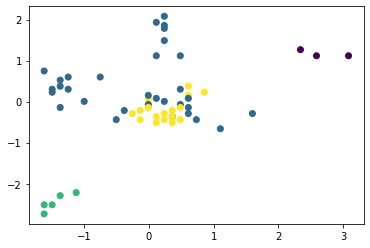

In [25]:
plt.scatter(X_fruits_scaled[:,1],X_fruits_scaled[:,2],c=kMeansFruits.labels_)

In [22]:
y_fruits2 = y_fruits - 1

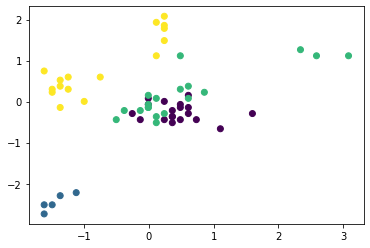

In [26]:
plt.scatter(X_fruits_scaled[:,1],X_fruits_scaled[:,2],c=y_fruits2)

###### Accuracy of clustering 

In [27]:
np.unique(kMeansFruits.predict(X_fruits_scaled))

array([0, 1, 2, 3], dtype=int32)

In [28]:
np.unique(y_fruits2)

array([0, 1, 2, 3])

* Know the mapping of the class labels in actual data and clusters.   
i.e. Apple = 1, Mandarin = 2, Orange = 3, Lemon = 4.

In [33]:
mode(kMeansFruits.predict(X_fruits_scaled[y_fruits == 1]))

3

Apple = 3 in the clusters

In [34]:
mode(kMeansFruits.predict(X_fruits_scaled[y_fruits == 2]))

2

Mandarin = 2 even in the clusters

In [41]:
kMeansFruits.predict(X_fruits_scaled[y_fruits == 3])

array([0, 0, 0, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 1, 3, 3, 3],
      dtype=int32)

No unique mode. 

In [43]:
mode(kMeansFruits.predict(X_fruits_scaled[y_fruits == 4]))

1

Lemon = 1 in the Clusters

Orange class thus would be 0. Now we compute the accuracies. 

In [54]:
print("Accuracy of kMeans clustering on the fruits dataset = {:.2f}".format((sum(kMeansFruits.predict(X_fruits_scaled[y_fruits == 1]) == 3) + sum(kMeansFruits.predict(X_fruits_scaled[y_fruits == 2]) == 2) + sum(kMeansFruits.predict(X_fruits_scaled[y_fruits == 3]) == 0) + sum(kMeansFruits.predict(X_fruits_scaled[y_fruits == 4]) == 1))/len(X_fruits_scaled)))


Accuracy of kMeans clustering on the fruits dataset = 0.59


Now I understand that what I did above is basically what the rand index does. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html

So now we check the rand index score and hope it comes the same as our result

In [80]:
from sklearn.metrics import adjusted_rand_score

In [78]:
adjusted_rand_score(y_fruits,kMeansFruits.predict(X_fruits_scaled))

0.2173295454545455

Hmm much lesser. But maybe as its adjusting for randomness. 

We try rand score. 

In [87]:
# from sklearn.metrics.cluster import rand_score

Rand score import did not work. Was not able to find the metric. We park this at the moment. TODO

#### Agglomerative clustering

In [55]:
from sklearn.cluster import AgglomerativeClustering

##### Synthetic dataset

In [56]:
X_synth,y_synth = make_blobs(
           random_state=10)

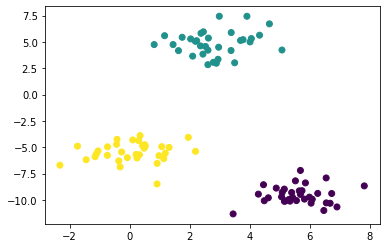

In [57]:
plt.scatter(X_synth[:,0],X_synth[:,1],c=y_synth)

In [58]:
aggcls = AgglomerativeClustering(n_clusters=3)

In [59]:
cls_pred = aggcls.fit_predict(X_synth)

Text(0.5, 1.0, 'Agglomerative clustering on synthetic dataset')

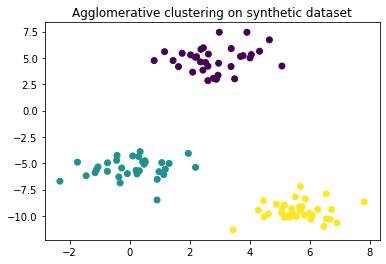

In [60]:
plt.scatter(X_synth[:,0],X_synth[:,1],c=cls_pred)
plt.title('Agglomerative clustering on synthetic dataset')

* Plot the clusters as a dendrogram

In [61]:
from scipy.cluster.hierarchy import ward,dendrogram

In [62]:
X_synth,y_synth = make_blobs(random_state=10,n_samples=10)

In [67]:
X_synth

array([[  5.69192445,  -9.47641249],
       [  1.70789903,   6.00435173],
       [  0.23621041,  -3.11909976],
       [  2.90159483,   5.42121526],
       [  5.85943906,  -8.38192364],
       [  6.04774884, -10.30504657],
       [ -2.00758803,  -7.24743939],
       [  1.45467725,  -6.58387198],
       [  1.53636249,   5.11121453],
       [  5.4307043 ,  -9.75956122]])

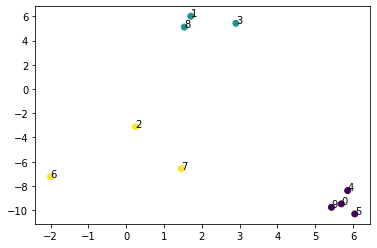

In [68]:
plt.scatter(X_synth[:,0],X_synth[:,1],c=y_synth)

for i,data in enumerate(X_synth):
  plt.annotate(i,data)

{'color_list': ['g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'b'],
 'dcoord': [[0.0, 0.9094607425269244, 0.9094607425269244, 0.0],
  [0.0, 1.4857900666423454, 1.4857900666423454, 0.9094607425269244],
  [0.0, 0.38523911551736995, 0.38523911551736995, 0.0],
  [0.0, 0.9720559282842687, 0.9720559282842687, 0.38523911551736995],
  [0.0, 1.802065097732964, 1.802065097732964, 0.9720559282842687],
  [0.0, 3.5252804986456834, 3.5252804986456834, 0.0],
  [0.0, 4.423673148183207, 4.423673148183207, 3.5252804986456834],
  [1.802065097732964,
   12.967894809480349,
   12.967894809480349,
   4.423673148183207],
  [1.4857900666423454,
   27.471629399563458,
   27.471629399563458,
   12.967894809480349]],
 'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [43.75, 43.75, 82.5, 82.5],
  [12.5, 12.5, 63.125, 63.125]],
 'ivl': ['3', '1', '8', '4', '5', '0', 

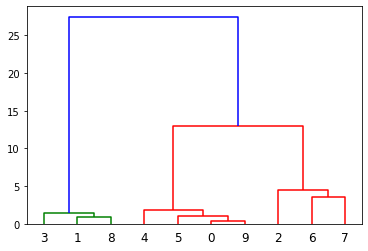

In [69]:
plt.figure()
dendrogram(ward(X_synth))

* All seem ok, except why 6 & 7 are merged before 2 & 7, as 2 & 7 are much closer than 6 & 7. (TODO)

#### DBSCAN Clustering

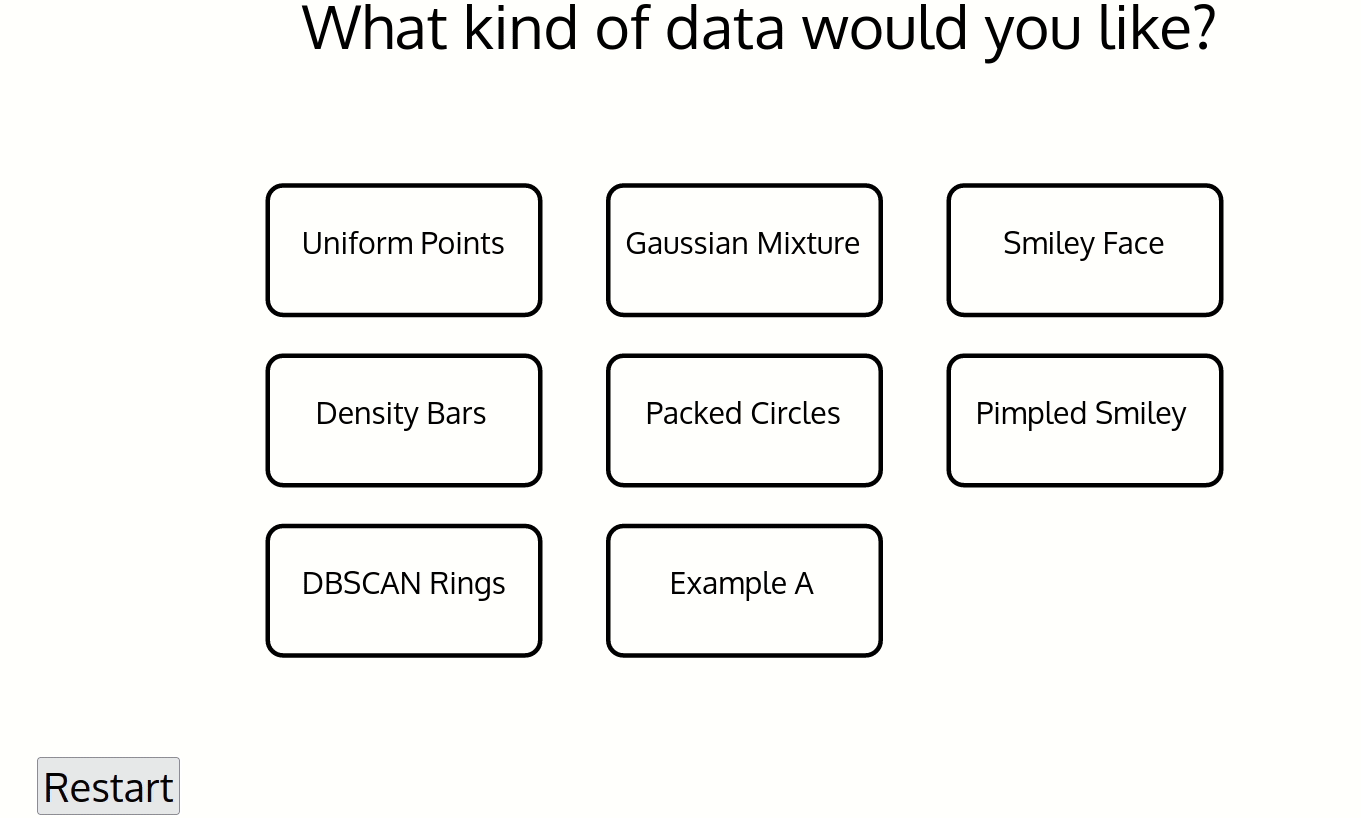

In [70]:
from sklearn.cluster import DBSCAN

In [71]:
X_synth,y_synth = make_blobs(n_samples=25,random_state=9)

Text(0.5, 1.0, 'Dataset for DBSCAN Clustering')

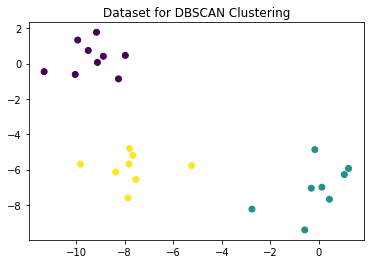

In [72]:
plt.scatter(X_synth[:,0],X_synth[:,1],c=y_synth)
plt.title('Dataset for DBSCAN Clustering')

In [73]:
dbscan = DBSCAN(eps=2,min_samples=2)

In [74]:
dbscan_pred = dbscan.fit_predict(X_synth)

Class membership values:  [ 0  1  0  2  0  0  0  2  2 -1  1  2  0  0 -1  0  0  1 -1  1  1  2  2  2
  1]


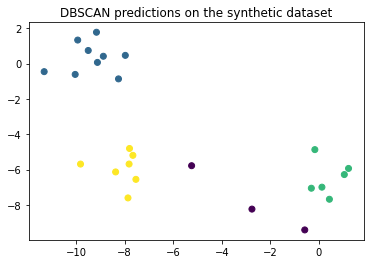

In [75]:
plt.scatter(X_synth[:,0],X_synth[:,1],c=dbscan_pred)
plt.title('DBSCAN predictions on the synthetic dataset')
print('Class membership values: ',dbscan_pred)

DBSCAN is nicely finding the clusters and ignoring the noisy points. 

## References & further reading:

References:
1. Applied Data Science in Python Course - Coursera



